<a href="https://colab.research.google.com/github/Ainard09/Computational_biology_drugs_discovery/blob/main/drug_discovery_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# load dataset from file

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.124939
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.000000
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.522879
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5899,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.735182
5900,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.872895
5901,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.716699
5902,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.377786


In [ ]:
# input and output features

X = df.drop('pIC50', axis=1)
y = df['pIC50']

In [ ]:
print(f"input features are {X.shape}")
print(f"output feature(pIC50) are {y.shape}")

input features are (5904, 881)
output feature(pIC50) are (5904,)


In [ ]:
from sklearn.feature_selection import VarianceThreshold

#reduce the redundancies in the input features
selection = VarianceThreshold(threshold=(.8 * (1-.8)))
X = selection.fit_transform(X)

In [ ]:
X.shape

(5904, 142)

In [ ]:
#split the dataset into train and test dataset

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (4723, 142), y_train: (4723,)
X_test: (1181, 142), y_test: (1181,)


## Building a Regression Model using Randon Forest

In [ ]:
from sklearn.metrics import *

# instantiate the RandomForestRegressor
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X_train, y_train)
r2 = model.score(X_test, y_test)


In [ ]:
r2

0.5676186647643544

In [ ]:
y_preds = model.predict(X_test)


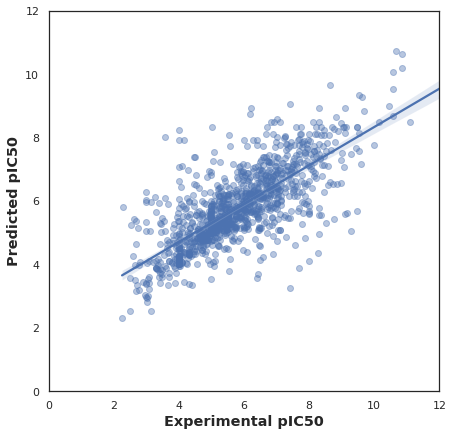

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=y_test, y=y_preds,  scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(7, 7)
plt.show
plt.savefig('regplot_pubchem_modeling.pdf')

In [ ]:
# fit the whole input features and output features to the model
model.fit(X, y)
r2 = model.score(X, y)
r2

0.8372650546853804

In [ ]:
y_preds = model.predict(X)
y_preds

array([5.99152148, 6.32211954, 5.32238429, ..., 7.43632689, 7.18682133,
       7.85487992])

In [ ]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y, y_preds))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y, y_preds))

Mean squared error (MSE): 0.40
Coefficient of determination (R^2): 0.84


In [ ]:
import pickle
# save the model to file 
pickle.dump(model, open('acetylcholinesterase_model.pkl', 'wb'))